<a href="https://colab.research.google.com/github/gigioo/MiniProjeto2_Walmart/blob/main/DS06_MiniProjeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Mini_Projeto 2 - Walmart

Giovanni Benini Bonatto

RID #43668


## Questão de Negócio


Walmart, Inc., é uma multinacional estadunidense de lojas de
departamento que contratou este estudo para ter alguns apontamentos
e análises de suas lojas , para que chegue a conclusão de quais lojas
valem a pena ser expandidas.
Analisar quanto cada loja vende e realizar comparações entre elas, além disso buscar atributos que tenham certas correlações com as vendas das lojas.


## Entendimento do negócio
Os dados que nos foram disponibilizados (Walmart.cs) são bem relevantes para os apontamentos e conclusões necessárias para chegarmos ao resultado que o cliente deseja, porém é necessário análisar de maneira correta para obter o resultado desejado.



Insights importantes :
- *Qual o preço médio de venda semanal por loja?;*

- *Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido);*

- *Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?;*

-  *Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.*

-  *Pensando na expansão de uma das lojas, que loja você escolheria e o por que?

# Coleta de dados
Os dados em sua grande maioria estão num formato correto para análise, o que pode ser feito é a formatação do campo Date e a quebra do mesmo em - Dia , Mês e Ano.

# Disponibilidade dos dados
- Store : Número da Loja
- Date : Semana de Venda
- Weekly_Sales : Venda Naquela Semana
- Holiday_Flag: Flag se é ou não semana com feriado (1 -
- Holiday Week :0 - Non-Holiday Week)
- Temperature : Temperatura do dia em °F
- Fuel_Price : Preço do combustível na região da loja
- CPI : Índice de preços ao consumidor
- Unemployment : Taxa de desemprego



# Limpeza de dados

# Exploração de dados

Pensando na expansão de uma das lojas, que loja você escolheria e o por que?
- A loja de Id 20, pois além de ser a loja que mais vendeu na somatória total de vendas por loja, a mesma vendeu a cima da média de lojas em todas as semanas,portanto o movimento de pessoas nessa loja é bem grande.




In [ ]:
#importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Consumo do csv e criação do df do walmart
df_walmart= pd.read_csv('/content/Walmart.csv',parse_dates=['Date'])


##Retirando algumas informações do sobre os Dados do DF.

In [ ]:

df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df_walmart.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      2010-01-10  1453329.50    0             71.89        2.603       211.671989  7.838           1
30     2012-10-19  437537.29     0             68.52        3.594       223.059808  6.170           1
31     2010-03-12  1338716.37    0             50.43        2.708       211.265543  8.163           1
       2010-03-09  1302047.48    0             82.57        2.577       211.188693  8.099           1
       2010-02-26  1344354.41    0             45.31        2.561       210.975957  8.324           1
                                                                                                   ..
15     2012-10-26  558473.60     0             55.75        4.071       138.728161  7.992           1
       2012-10-19  555652.77     0             52.89        4.153       138.833613  7.992           1
       2012-10-08  590453.63     0             73.99        3.863       138.143774  8.1

In [ ]:
#Criando colunas Week, Month e  Year a partir da  coluna date
df_walmart['Week'] = pd.DatetimeIndex(df_walmart['Date']).weekday
df_walmart['Month'] = pd.DatetimeIndex(df_walmart['Date']).month
df_walmart['Year'] = pd.DatetimeIndex(df_walmart['Date']).year

df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


##1. Qual o preço médio de vendas semanal por loja?

In [ ]:
#Criando DF com a média de vendas por semana agrupado por Loja
df_media_vendas_por_loja=df_walmart.groupby(['Store'])['Weekly_Sales'].agg('mean').reset_index()
#Ordenando por maior média de vendas por loja
df_media_vendas_por_loja_ordenado=df_media_vendas_por_loja.sort_values(by=['Weekly_Sales'],ascending=False)
df_media_vendas_por_loja_ordenado

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


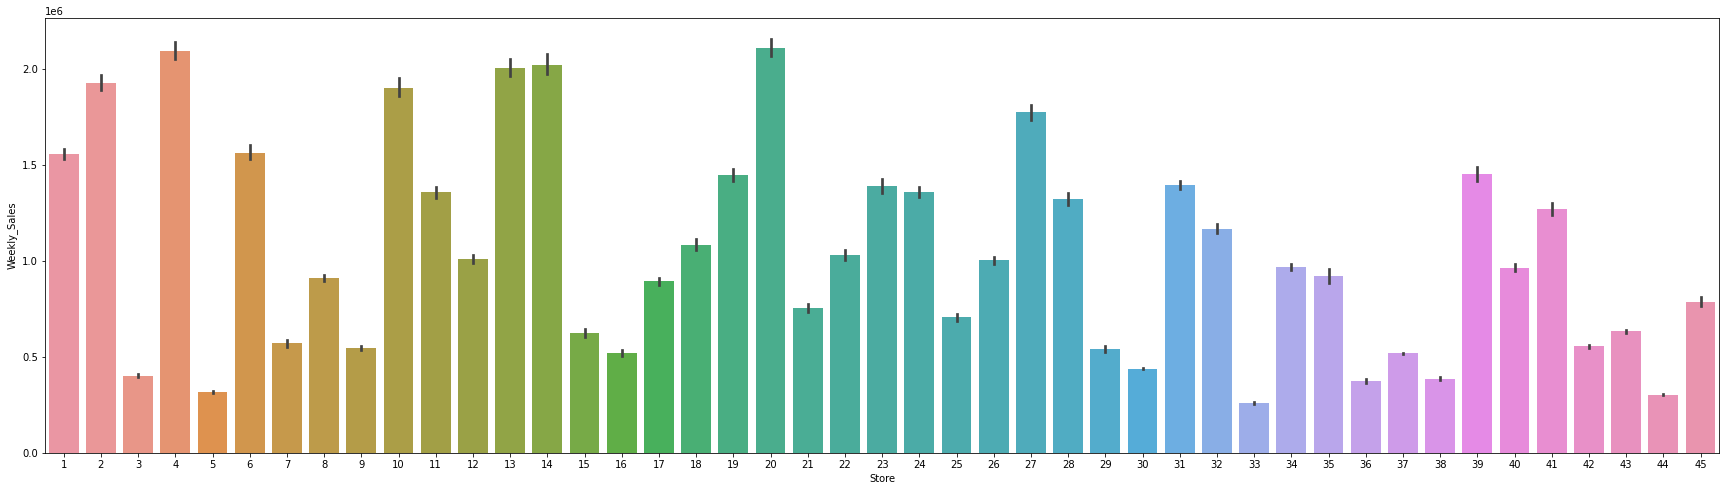

In [ ]:
# Criação de gráfico de barras com o df de média de vendas por semana
fig, axes =plt.subplots(figsize=(30,8))
sns.barplot(data=df_walmart, x='Store',y='Weekly_Sales',ax= axes);
# Lojas com maior média de vendas : 20,4,2,13,12,1

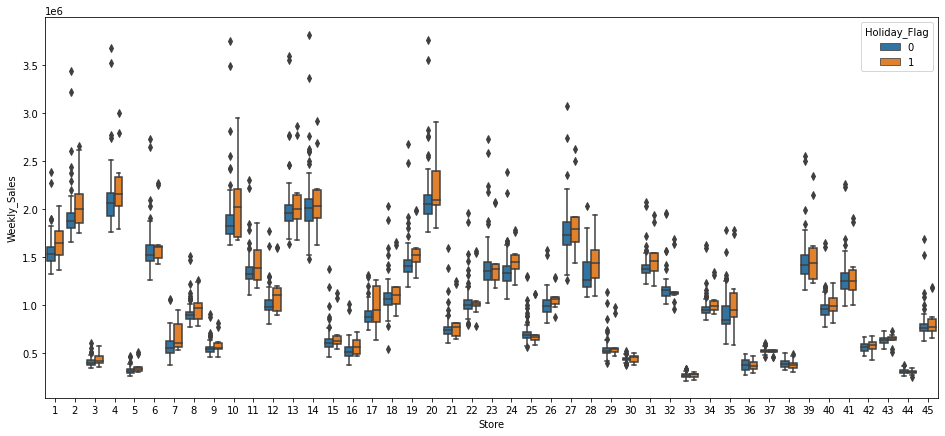

In [ ]:

#Gráfico com as vendas por loja  ressaltando os feriados.
fig = plt.figure(figsize=(16,7))
sns.boxplot(data=df_walmart, x='Store', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()


## Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)


In [ ]:
#Realizando a correlação entre os campos  percebemos que:
# campo com maior correlação negativa : Unemployment - com alta na taxa de desemprego faz as vendas caem bastante
df_walmart.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-2.243183e-15,6.289676e-16,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-2.104085e-02,6.753523e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-9.100474e-02,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,1.833136e-02,6.643970e-02,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-2.651216e-02,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-9.595877e-03,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,3.777320e-02,-2.061552e-03,-2.418135e-01
Week,-2.243183e-15,-0.021041,-9.100474e-02,0.018331,-0.026512,-0.009596,0.037773,1.000000e+00,-1.387259e-01,-9.923791e-02
Month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-1.387259e-01,1.000000e+00,-1.390145e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-9.923791e-02,-1.390145e-01,1.000000e+00


In [ ]:
# criação de df com a soma de todas as vendas por loja
df_soma_vendas_por_loja=df_walmart.groupby(['Store'])['Weekly_Sales'].agg('sum').reset_index()

df_soma_vendas_por_loja.sort_values(by=['Weekly_Sales'] ,ascending=False)


,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


##Da loja com maior venda acumulada (soma de vendas de todo o período), quantas
semanas do ano ele ultrapassou a média do período?


In [ ]:
#Criando DF com as vendas semanais da loja que obteve o maior número de vendas.
df_store20=df_walmart[df_walmart['Store']==20]
df_store20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
2717,20,2010-05-02,2401395.47,0,25.92,2.784,204.247194,8.187,6,5,2010
2718,20,2010-12-02,2109107.90,1,22.12,2.773,204.385747,8.187,3,12,2010
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,4,2,2010
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,4,2,2010
2721,20,2010-05-03,2119213.72,0,31.75,2.777,204.494073,8.187,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280,4,9,2012
2856,20,2012-05-10,2246411.89,0,60.77,3.985,215.925886,7.293,3,5,2012
2857,20,2012-12-10,2162951.36,0,47.20,4.000,216.115057,7.293,0,12,2012
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293,4,10,2012


In [ ]:
#Calculando quantas semanas a loja 20 vendeu mais do que a média nesse período
#primeiramento criando um DF com a soma semanal de vendas da Loja Id 20
df_store20_week=df_store20.groupby(['Date'])['Weekly_Sales'].agg('sum').reset_index()
df_store20_week

,Date,Weekly_Sales
0,2010-01-10,1933719.21
1,2010-02-04,2405395.22
2,2010-02-07,2143676.77
3,2010-02-19,2161549.76
4,2010-02-26,1898193.95
...,...,...
138,2012-10-08,2144245.39
139,2012-10-19,1999363.49
140,2012-10-26,2031650.55
141,2012-11-05,2168097.11


In [ ]:
#Criando DF com a média semanal de vendas geral agrupado por semana
df_walmart_mean_data=df_walmart.groupby(['Date'])['Weekly_Sales'].agg('mean').reset_index()
#colocando a coluna média geral no df_store20_week
df_store20_week['Media Geral']=df_walmart_mean_data['Weekly_Sales']
df_store20_week

,Date,Weekly_Sales,Media Geral
0,2010-01-10,1933719.21,9.386639e+05
1,2010-02-04,2405395.22,1.120530e+06
2,2010-02-07,2143676.77,1.087055e+06
3,2010-02-19,2161549.76,1.072822e+06
4,2010-02-26,1898193.95,9.770794e+05
...,...,...,...
138,2012-10-08,2144245.39,1.053410e+06
139,2012-10-19,1999363.49,1.002720e+06
140,2012-10-26,2031650.55,1.012091e+06
141,2012-11-05,2168097.11,1.042797e+06


In [ ]:
#Criando DF com a comparação entre os 2.
df_store20_acima_media=df_store20_week[df_store20_week['Weekly_Sales']>df_store20_week['Media Geral']]
#Contando o número de linhas(Semanas) que a loja 20 ultrapassou a média do período. - em todas as semanas.
df_store20_acima_media.count()

Date            143
Weekly_Sales    143
Media Geral     143
dtype: int64

#Pensando na expansão de uma das lojas, que loja você escolheria e o por que?
##  A loja de Id 20, pois além de ser a loja que mais vendeu na somatória total de vendas por loja, a mesma vendeu a cima da média de lojas em todas as semanas,portanto o movimento de pessoas nessa loja é bem grande.